In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('AIRI-Institute/gena-lm-bert-base-t2t')
from Bio.Seq import Seq
import random

In [23]:
# simulation
n_samples = 2_000_000
D = list(range(0, n_samples))

# let's assume that restarts happen once a day
# 40 days of training ~ 40 restarts
n_restarts = 40

unique_samples = set()
for i in range(n_restarts):
    d = random.sample(D, k= n_samples // n_restarts)
    unique_samples.update(set(d))

len(unique_samples) / n_samples

0.636333

  0%|          | 0/50 [00:00<?, ?it/s]

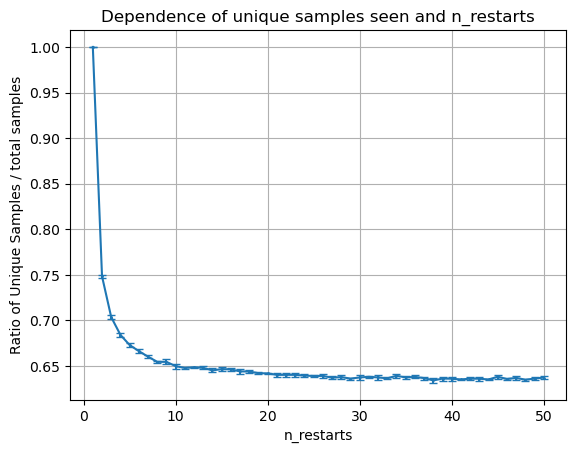

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

n_samples = 20_000
D = list(range(n_samples))
n_epochs = 1
num_trials = 5

# We'll test n_restarts values from 1 to 50
n_restarts_values = range(1, 51)
mean_ratios = []
std_ratios = []

for n_restarts in tqdm(n_restarts_values):
    trial_ratios = []
    for _ in range(num_trials):
        unique_samples = set()
        # For each restart, sample n_samples // n_restarts samples
        for _ in range(n_restarts):
            sample = random.sample(D, k=n_samples // n_restarts)
            unique_samples.update(sample)
        ratio = len(unique_samples) / n_samples
        trial_ratios.append(ratio)
    mean_ratios.append(np.mean(trial_ratios))
    std_ratios.append(np.std(trial_ratios))

plt.errorbar(n_restarts_values, mean_ratios, yerr=std_ratios, fmt='-o', capsize=3, markersize=1)
plt.xlabel('n_restarts')
plt.ylabel('Ratio of Unique Samples / total samples')
plt.title('Dependence of unique samples seen and n_restarts')
plt.grid(True)
plt.show()


Epochs = 1:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs = 2:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs = 3:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs = 4:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs = 5:   0%|          | 0/50 [00:00<?, ?it/s]

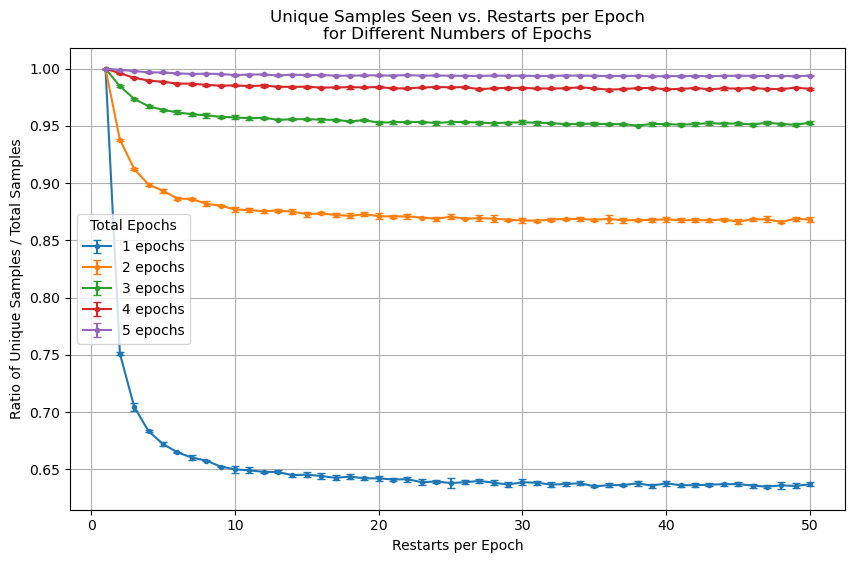

In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

n_samples = 20_000
D = list(range(n_samples))
num_trials = 5

# Test values for restarts per epoch (x-axis)
restarts_per_epoch_values = range(1, 51)
# Different total epochs to simulate
epochs_list = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))

for n_epochs in epochs_list:
    mean_ratios = []
    std_ratios = []
    # Loop over different numbers of restarts per epoch
    for restarts_per_epoch in tqdm(restarts_per_epoch_values, desc=f"Epochs = {n_epochs}"):
        trial_ratios = []
        for _ in range(num_trials):
            unique_samples = set()
            # For each epoch, simulate training divided into segments
            for _ in range(n_epochs):
                for _ in range(restarts_per_epoch):
                    # In one epoch, we split the dataset into "restarts_per_epoch" segments.
                    # Each segment processes n_samples // restarts_per_epoch samples.
                    sample = random.sample(D, k=n_samples // restarts_per_epoch)
                    unique_samples.update(sample)
            ratio = len(unique_samples) / n_samples
            trial_ratios.append(ratio)
        mean_ratios.append(np.mean(trial_ratios))
        std_ratios.append(np.std(trial_ratios))
    
    plt.errorbar(
        restarts_per_epoch_values, mean_ratios, yerr=std_ratios,
        fmt='-o', capsize=3, markersize=3, label=f'{n_epochs} epochs'
    )

plt.xlabel('Restarts per Epoch')
plt.ylabel('Ratio of Unique Samples / Total Samples')
plt.title('Unique Samples Seen vs. Restarts per Epoch\nfor Different Numbers of Epochs')
plt.legend(title='Total Epochs')
plt.grid(True)
plt.show()


In [8]:
from streaming.base.util import merge_index

In [13]:
merge_index('../human_t2t_1k_int8', keep_local=True)